In [1]:
%config Completer.use_jedi = False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import random
import numpy
import scipy.stats as stats
import scipy.cluster.vq as vq

In [3]:
import crp_clustering

- `r = stats.norm.rvs(size=1000)` generates 1000 random numbers distributed acc, to N(0, 1)

In [10]:
r = stats.norm.rvs(size=1000)
r.shape

(1000,)

In [22]:
true_means = [0, 10, 12]
data = np.concatenate((stats.norm.rvs(0, 1, size=400), stats.norm.rvs(10,1,size=400), stats.norm.rvs(12, 1, size=400)))
random.shuffle(data)

In [23]:
data.shape

(1200,)

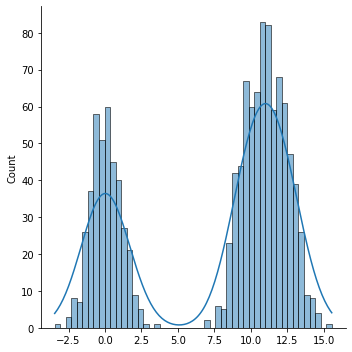

In [59]:
sns.displot(data, bins=50, kde=True)
plt.show()

## Likelihood function structure:
The likelihood function must be have this form: `def likelihood_fn(data, i, clustering, cluster_assn)` and it
```python
        Returns a vector x of length len(clustering) + 1 
        x[j] = P(data[i] | the cluster assignment so far AND data[i] assign to cluster j)
		where
		clustering - a list of clusters. Each cluster is a list of indices in the data
		cluster assignment - a list of cluster number (assignment)
			Examples
			Cluster 0 contains data from [1, 2, 5]
			Cluster 1 contains data from [0, 3, 4]
			Then clustering == [ [1,2,5], [0,3,4] ]
			AND cluster_assn = [1, 0, 0, 1, 1, 0]
			Note that the two formats are redundant.
```

In [28]:
def example_likelihood_fn(data, i, clustering, cluster_assn):
    """Example of likelihood function """
    means = [np.mean(data[list(cluster)]) for cluster in clustering]
    means.append(0)	
    stds = [1 for cluster in clustering]
    stds.append(10)
    return stats.norm.pdf(data[i], means, stds)

$\alpha$ = concentration hyperparameter = 1.0

In [26]:
crp_model = crp_clustering.CRPClusterModel(1.0, example_likelihood_fn)

In [29]:
clustering, cluster_assn = crp_model.cluster(data)
means = [numpy.mean(data[list(cluster)]) for cluster in clustering]

In [33]:
len(cluster_assn), len(clustering)

(1200, 4)

In [34]:
means

[9.748332801114293,
 12.267933259498891,
 0.050676919535417024,
 10.538883002779754]

In [35]:
print('True means are %s.\nCluster means are %s.' % (true_means, means))

True means are [0, 10, 12].
Cluster means are [9.748332801114293, 12.267933259498891, 0.050676919535417024, 10.538883002779754].


In [60]:
x = np.linspace(-5, 15, 5000)

In [61]:
y = [stats.norm(loc=mean).pdf(x) for mean in means]
y = np.array(y).sum(axis=0)

In [62]:
y.shape

(5000,)

### pdf with learned means

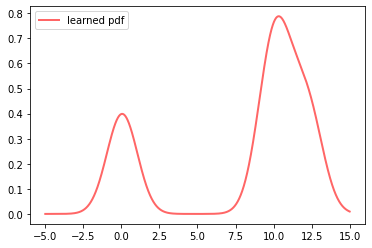

In [67]:
plt.plot(x, y, 'r-', lw=2, alpha=0.6, label='learned pdf')
plt.legend()
plt.show()